[7.05, 16.42, 5.26, 13.17, 6.19, 8.25, 9.24, 4.03, 52.31, 11.82, 14.94, 4.24, 17.15, 17.42, 27.43]


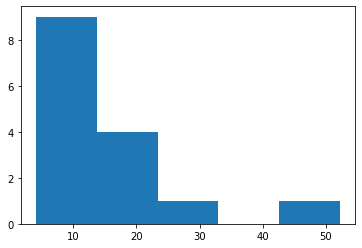

[9.42, 42.26, 'unsolved', 53.65, 124.22, 'unsolved', 41.44, 22.81, 12.9, 17.69, 8.33, 13.45, 99.36, 9.26, 32.98]


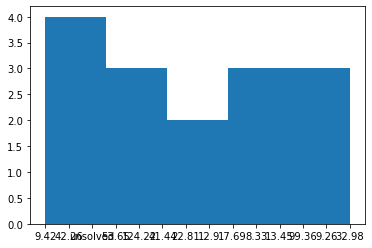

['unsolved', 'unsolved', 'unsolved', 95.42, 'unsolved', 'unsolved', 91.49, 28.08, 'unsolved', 11.31, 29.78, 'unsolved', 35.37, 'unsolved', 'unsolved']


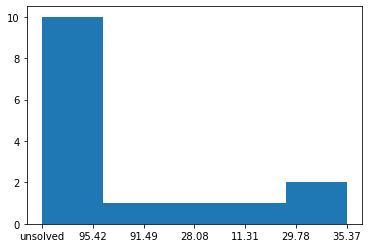

[34.73, 52.07, 57.53, 42.73, 6.52, 27.63, 114.45, 15.63, 19.21, 10.96, 12.23, 5.41, 46.73, 12.43, 20.22]


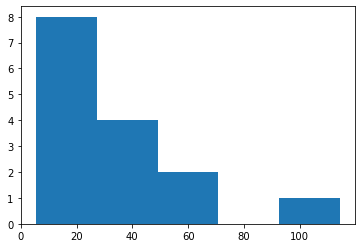

[7.39, 8.17, 3.98, 4.58, 15.97, 7.47, 8.61, 4.86, 6.36, 5.19, 4.91, 4.41, 41.25, 27.8, 3.78]


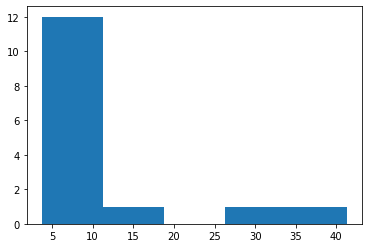

In [71]:
import json 
from collections import defaultdict
import statistics 
import matplotlib.pyplot as plt

domain = "woodworking"

database_files = [f"../optimization/results/{x}" for x in ["2020-12-04-A-smac-opt-2014-10h.json", "2020-12-08-A-smac-opt-2014-20h.json", "2020-12-10-A-smac-opt-2014-20h.json"]]
runtimes  = defaultdict(list)
seeds = defaultdict(list)

for db in database_files:
    with open(db) as f:
        content = json.load(f)
        if len(content[domain]["sart_runtimes"]) == 0:
            continue
        params =  content[domain]["sart_runtimes"][0][0]
        parameter_list = [x for x in sorted(params.keys()) if x != "seed"]

        for (params, time) in content[domain]["sart_runtimes"]:
            values = tuple([params[atr] for atr in parameter_list])

            if params['seed'] not in seeds[values]: 
                runtimes[values] += time
                seeds [values] += [params['seed']]
    
def mean(values):
    filtered = [x for x in values if x != "unsolved"]
    if len(filtered):
        return statistics.mean(filtered) 
    return 200


candidates = [k for k, x in runtimes.items() if mean(x) >= 10 and mean(x) <= 60 and len(x) >= 10
             ]
#max_samples = max([len(runtimes[k]) for k in candidates])
#candidates = [k for k in candidates if len(runtimes[k]) >= max_samples -5 ]
#min_mean = min([mean(runtimes[k]) for k in candidates])
#candidates = [k for k in candidates if mean(runtimes[k]) == min_mean]

for c in candidates[:5]: 
    print(runtimes[c])
    plt.hist(runtimes[c], 5)
    
    plt.show()
